In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('Courses.db')
cursor = conn.cursor()

In [3]:
cursor.execute("""
create table if not exists students(
  student_id text primary key,
  name text,
  major text
)
""")

cursor.execute("""
create table if not exists courses(
  course_id text primary key,
  title text,
  credits integer
)
""")

cursor.execute("""
create table if not exists enrollments(
  student_id text,
  course_id text,
  grade text,
  primary key (student_id,course_id),
  foreign key(student_id) references students(student_id),
  foreign key(course_id) references courses(course_id)
)
""")
conn.commit()

In [4]:
students_data = [
    ('S1', 'Lina', 'Computer Science'),
    ('S2', 'Omar', 'Data Science'),
    ('S3', 'Sara', 'Business'),
    ('S4', 'Yousef', 'Computer Science')
]

courses_data = [
    ('C1', 'Databases', 3),
    ('C2', 'Python Programming', 4),
    ('C3', 'Statistics', 3),
    ('C4', 'Machine Learning', 4)
]

enrollments_data = [
    ('S1', 'C1', 'A'),
    ('S1', 'C2', 'B'),
    ('S2', 'C2', 'A'),
    ('S2', 'C3', 'B'),
    ('S3', 'C3', 'A'),
    ('S3', 'C4', 'C'),
    ('S4', 'C1', 'A'),
    ('S4', 'C4', 'B')
]

cursor.executemany("INSERT INTO students VALUES (?, ?, ?)", students_data)
cursor.executemany("INSERT INTO courses VALUES (?, ?, ?)", courses_data)
cursor.executemany("INSERT INTO enrollments VALUES (?, ?, ?)", enrollments_data)
conn.commit()


In [9]:
query = """
SELECT students.name, courses.title, enrollments.grade
FROM students
LEFT JOIN enrollments ON students.student_id = enrollments.student_id
LEFT JOIN courses ON enrollments.course_id = courses.course_id;
"""

df = pd.read_sql_query(query, conn)

In [10]:
df

,name,title,grade
0,Lina,Databases,A
1,Lina,Python Programming,B
2,Omar,Python Programming,A
3,Omar,Statistics,B
4,Sara,Statistics,A
5,Sara,Machine Learning,C
6,Yousef,Databases,A
7,Yousef,Machine Learning,B


In [11]:
df.columns


Index(['name', 'title', 'grade'], dtype='object')

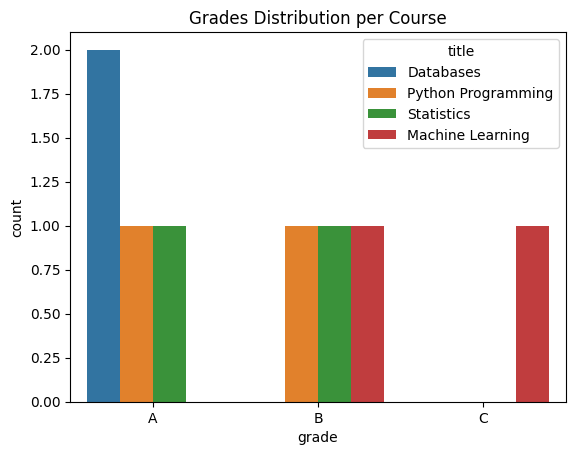

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="grade", hue="title", data=df)
plt.title("Grades Distribution per Course")
plt.show()

